In [1]:
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from mpl_toolkits import mplot3d

In [3]:
sys.path.insert(0, '../')

## Setup detector with card

In [4]:
from detmodel import detector
from detmodel import plane
from detmodel import signal

In [5]:
my_detector = detector.Detector()
my_detector.read_card('../cards/atlas_nsw_pad_z0.yml')
#my_detector.read_card('../cards/atlas_mm_road.yml')

-- Initializing detector --
-- Reading card --


## Coverage angle

In [6]:
def get_coverage_angles(x):
    dz = my_detector.planes[-1].z - my_detector.planes[0].z
    dx = 0.5*my_detector.planes[-1].sizes['x']
    th_p = np.max( [np.arctan((dx-x)/dz), 0] )
    th_m = np.min( [-np.arctan((dx+x)/dz), 0] )
    return (th_m,th_p)

In [7]:
get_coverage_angles(24)

(-0.12783098927117978, 0.0)

## Pass muon

In [8]:
mux = 10
mua = get_coverage_angles(mux)[1]

my_detector.reset_planes()
my_detector.add_muon(
        mu_x=mux, 
        mu_y=0, 
        mu_theta=mua, 
        mu_phi=0, 
        mu_time=0
    )

## Add noise

Noise rate in Hertz per strip is set in detector cards. First argument here is a multiplicative scale factor. Second argument is a random seed number.

In [9]:
my_detector.add_noise(100, randseed=41)

## Process signal

In [10]:
sigs = my_detector.get_signals(summary=True)

Total number of hits: 110
Total number of hits: 128
Total number of hits: 131
Total number of hits: 111
Total number of hits: 138
Total number of hits: 122
Total number of hits: 184
Total number of hits: 180
Total number of hits: 166
Total number of hits: 178
Total number of hits: 167
Total number of hits: 152
Total number of hits: 108
Total number of hits: 108
Total number of hits: 111
Total number of hits: 93


## Plot detector volume

In [11]:
from plotting import plotting

In [12]:
import importlib
importlib.reload(plotting)

<module 'plotting.plotting' from '/gpfs/slac/atlas/fs1/u/rafaeltl/Muon/21062022/si-mu-lator/notebooks/../plotting/plotting.py'>

In [13]:
%matplotlib widget

Found muon signal, plane  0  xseg  6  time  1.5945109234469168
Found muon signal, plane  1  xseg  6  time  5.284316829631641
Found muon signal, plane  2  xseg  6  time  -0.281987362825336
Found muon signal, plane  3  xseg  7  time  -8.265006100849005
Found bkg signal, plane  4  xseg  74  time  -99.23881980682539
Found bkg signal, plane  5  xseg  39  time  -99.90490454824818
Found bkg signal, plane  6  xseg  22  time  -97.60933959040183
Found bkg signal, plane  6  xseg  38  time  -99.17356908607988
Found bkg signal, plane  7  xseg  36  time  -97.67437142397645
Found bkg signal, plane  7  xseg  100  time  -99.39808677537943
Found bkg signal, plane  8  xseg  15  time  -98.50255487803732
Found bkg signal, plane  8  xseg  103  time  -99.47007749437755
Found bkg signal, plane  9  xseg  3  time  -97.48664959750587
Found bkg signal, plane  9  xseg  32  time  -96.27572069332466
Found bkg signal, plane  10  xseg  2  time  -99.85419745567758
Found bkg signal, plane  11  xseg  63  time  -95.226746

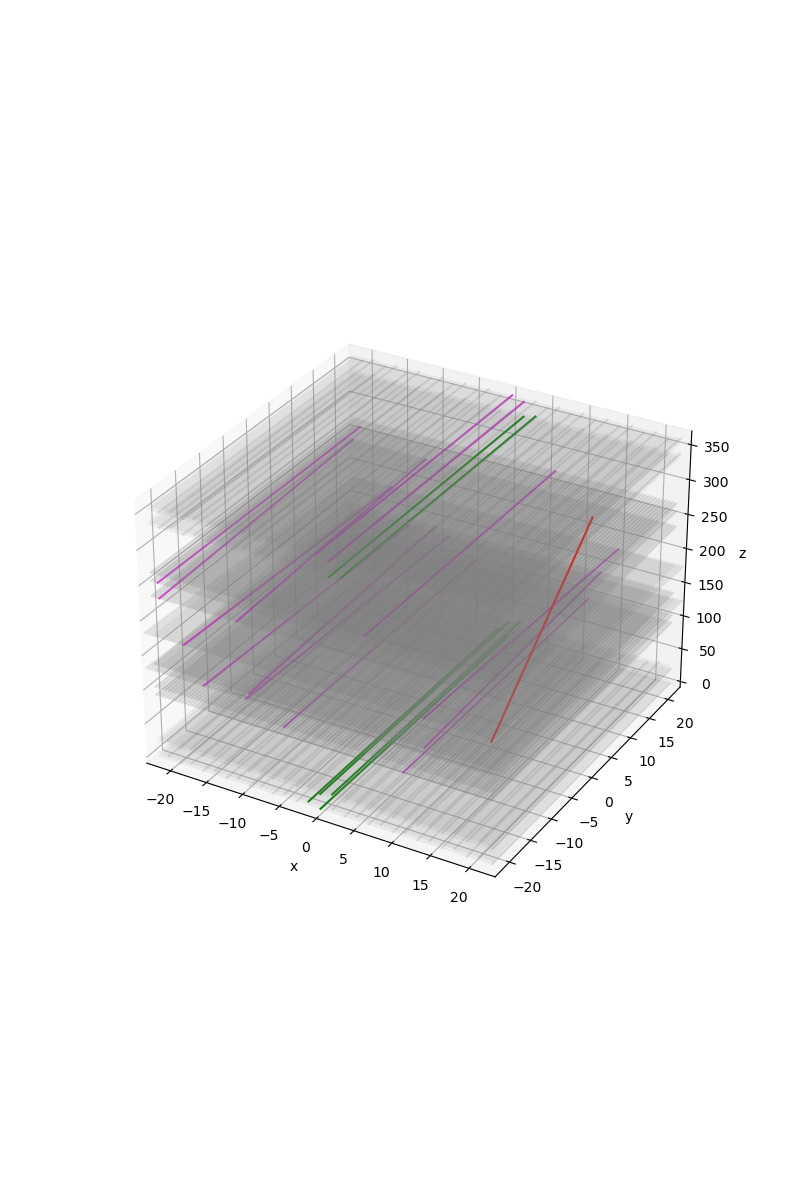

In [14]:
fig = plt.figure(figsize=(8,12))
ax = plt.axes(projection='3d')
plotting.plot_det_volume(my_detector, ax, draw_muon=1)

skip hit 6
skip hit 8
skip hit 10
skip hit 13
skip hit 15
skip hit 16
skip hit 17
skip hit 18
skip hit 19
skip hit 21
skip hit 22
skip hit 23
skip hit 24
skip hit 25
skip hit 26
skip hit 27
skip hit 28
skip hit 30
skip hit 31
skip hit 32
skip hit 33
skip hit 35
skip hit 36
skip hit 37
skip hit 38
skip hit 39
skip hit 40
skip hit 41
skip hit 42
skip hit 43
skip hit 44
skip hit 45
skip hit 46
skip hit 47
skip hit 48
skip hit 49
skip hit 50
skip hit 51
skip hit 52
skip hit 53
skip hit 54
skip hit 55
skip hit 56
skip hit 57
skip hit 58
skip hit 59
skip hit 61
skip hit 62
skip hit 63
skip hit 64
skip hit 65
skip hit 66
skip hit 67
skip hit 68
skip hit 69
skip hit 70
skip hit 71
skip hit 72
skip hit 73
skip hit 74
skip hit 75
skip hit 76
skip hit 77
skip hit 78
skip hit 79
skip hit 80
skip hit 81
skip hit 82
skip hit 83
skip hit 84
skip hit 85
skip hit 86
skip hit 87
skip hit 88
skip hit 89
skip hit 90
skip hit 91
skip hit 92
skip hit 93
skip hit 94
skip hit 95
skip hit 96
skip hit 97
skip h

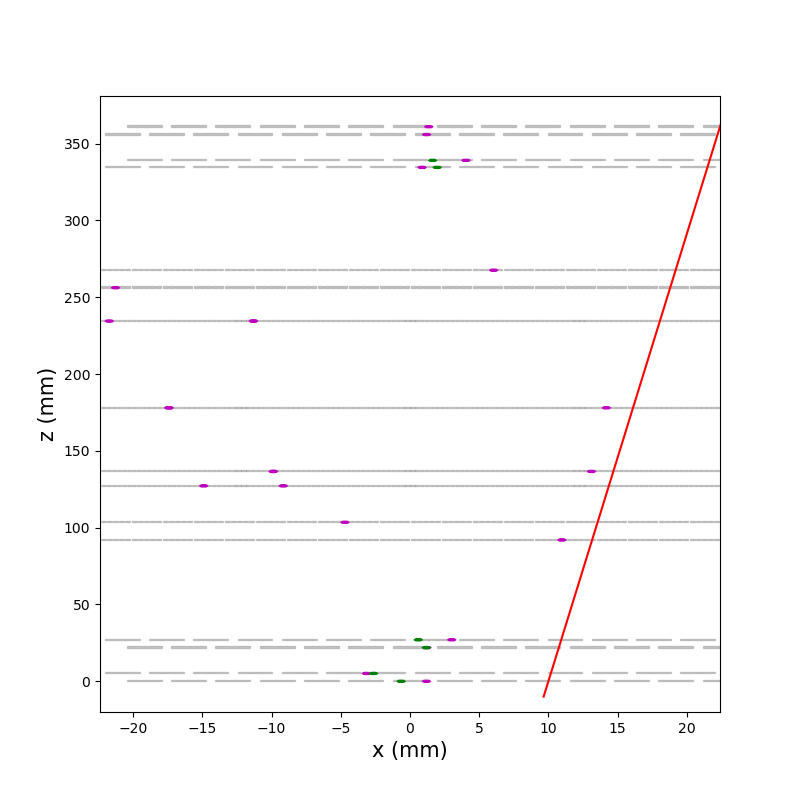

In [15]:
fig2 = plt.figure(figsize=(8,8))
ax2 = plt.axes()
plotting.plot_det_xz(my_detector, ax2, draw_muon=True, draw_allhits=False)
plt.show()